## Task 1: Introduction

Welcome to this project on how to avoid overfitting with regularization. We will take a look at two types of regularization techniques: weight regularization and dropout regularization.

![Overfitting](images/overfitting.png)


## Task 2: Importing the Data
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


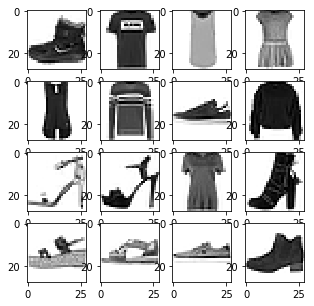

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(5,5))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap = "binary")
plt.show()

## Task 3: Processing the Data
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___
Original Label: \[5\] is converted to -> One Hot Encoded Label: \[0, 0, 0, 0, 0, 1, 0, 0, 0, 0\]

In [4]:
## convert the labels to one-hot endoding array
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0:3])

(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
import numpy as np

## reshape the data.
x_train = np.reshape(x_train, (60000, 28*28))
x_test = np.reshape(x_test, (10000, 28*28))

#normalize the data.
x_train = x_train/255.
x_test = x_test/255.

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


## Task 4: Regularization and Dropout
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

![Neural Network](images/neural_network.png)

#### Dropouts:

![Dropouts](images/dropouts.png)


## Task 5: Creating the Experiment Part 1
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


def create_model(weight_regularizer=False, dropout_regularizer=False):
    
    model = Sequential()
    
    if weight_regularizer:
        model.add( Dense(units=64, input_shape = (784,), kernel_regularizer = l2(0.001), activation='relu')
                 )
        model.add( Dense(units=64, kernel_regularizer = l2(0.001), activation = 'relu') 
                 )
    else:
        model.add( Dense(units=64, input_shape = (784,), activation='relu') 
                 )
        model.add( Dense(units=64, activation = 'relu') 
                 )
        
    if dropout_regularizer:
        model.add( Dropout(rate=0.2) 
                 )
        
    model.add( Dense(units=10, activation='softmax') )
    
    model.compile( loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy']
                 )
    
    model.summary()
    
    return model
        

## Task 6: Creating the Experiment Part 2
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

In [20]:
def show_accuracy(history, epoch):
    plt.plot(range(epoch), history.history['acc'], label='Training')
    plt.plot(range(epoch), history.history['val_acc'], label='Validation')
    plt.legend()
    plt.show()
    return

In [18]:
from tensorflow.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(e, end= ".")
)


def run_model(epoch=20, weight_regularizer=False, dropout_regularizer=False):
    m = create_model(weight_regularizer, dropout_regularizer)
    h = m.fit(x_train, y_train, 
              epochs=epoch, 
              validation_data = (x_test, y_test),
              callbacks=[simple_log],
              verbose=False)
    
    show_accuracy(h, epoch)
    return

## Task 7: Results
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting Kernel > Restart and Run All
___

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

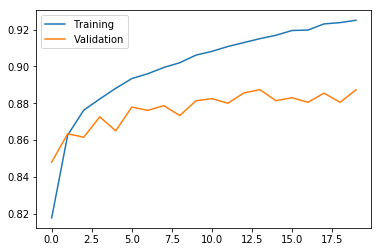

In [21]:
run_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

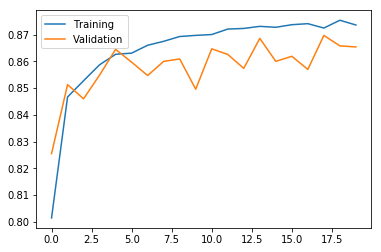

In [23]:
run_model(weight_regularizer=True, dropout_regularizer=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

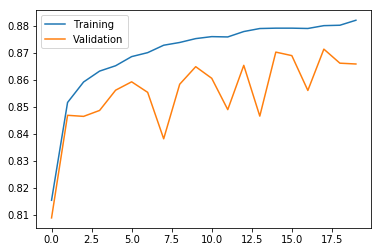

In [24]:
run_model(weight_regularizer=True, dropout_regularizer=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

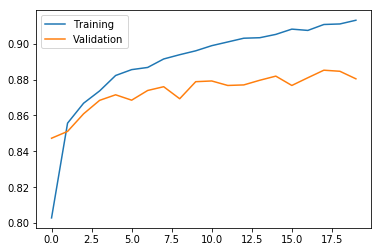

In [25]:
run_model(weight_regularizer=False, dropout_regularizer=True)